Dataset Overview
This project utilizes the Life Expectancy Data dataset, which contains information about the health and socio-economic indicators of various countries across several years. The dataset was originally compiled by the World Health Organization (WHO) in collaboration with other organizations and is publicly available.

Source
The dataset was obtained from a publicly available source, commonly found on [Kaggle](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who) or WHO’s data repositories.

Objective
The main objective of using this dataset is to analyze the factors that influence life expectancy in different countries. This includes identifying correlations between life expectancy and factors such as income, schooling, immunization, and health expenditure.

Dataset Structure
Rows: Each row represents a country in a specific year.
Columns: The dataset contains around 22 columns including:
`Country`, `Year`, `Life expectancy`, `Adult Mortality`, `Hepatitis B`, `BMI`, `GDP`, `Schooling`, etc.
The target variable is `Life expectancy`.

Format and Size
The dataset is stored in CSV format.
It's lightweight and easily loaded into memory.

Initial Observations
Contains both numerical and categorical variables.
There are some missing values that may need to be handled.
Some features may require transformation or normalization for analysis or modeling.

Licensing
This dataset is available for public use and educational purposes, with no known restrictions.

Missing Data Handling
After inspecting the dataset, we found no missing values across any of the features. Therefore, no imputation or row/column removal was necessary.

Feature Identification
The dataset contains both categorical and numerical variables. After removing identifiers and analyzing correlation, the following features were identified as potentially useful for predicting life expectancy:
- `Adult Mortality`
- `Schooling`
- `HIV/AIDS`
- `BMI`
- `Income composition of resources`
- `Total expenditure`
- `GDP`
- `Alcohol`
- `Status` (categorical)
- Immunization coverage: `Polio`, `Diphtheria`, `Hepatitis B`
These features were selected based on domain knowledge, relevance to health outcomes, and correlation with the target variable.
We computed the correlation matrix to find features most strongly related to the target variable (`Life expectancy`). The correlation matrix shows the strength and direction of linear relationships.
We selected features that had:
- Strong positive correlation with life expectancy (e.g., `Schooling`, `Income composition of resources`)
- Strong negative correlation (e.g., `Adult Mortality`, `HIV/AIDS`)
- Sufficient variation and domain relevance (e.g., `BMI`, `GDP`, `Status`, and immunization rates)
Highly correlated redundant features (like `thinness 1-19` and `thinness 5-9`) were excluded to avoid multicollinearity.
This analysis helped us identify the most relevant predictors for life expectancy.



In [2]:
import pandas as pd
df = pd.read_csv('Life_Expectancy_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [4]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [5]:
df.shape

(1649, 22)

In [6]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
print(df.columns.tolist())

['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [8]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [9]:
percentage_missing = (missing_values / len(df)) * 100
print("Percentage of missing values in each column:\n", percentage_missing)

Percentage of missing values in each column:
 Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
 BMI                               0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
 HIV/AIDS                          0.0
GDP                                0.0
Population                         0.0
 thinness  1-19 years              0.0
 thinness 5-9 years                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64


In [10]:
# Combine into one DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': percentage_missing
})

# Filter to show only columns with missing data
missing_data = missing_data[missing_data['Missing Values'] > 0]
missing_data.sort_values(by="Percentage (%)", ascending=False)

,Missing Values,Percentage (%)


In [11]:
target = "Life expectancy"

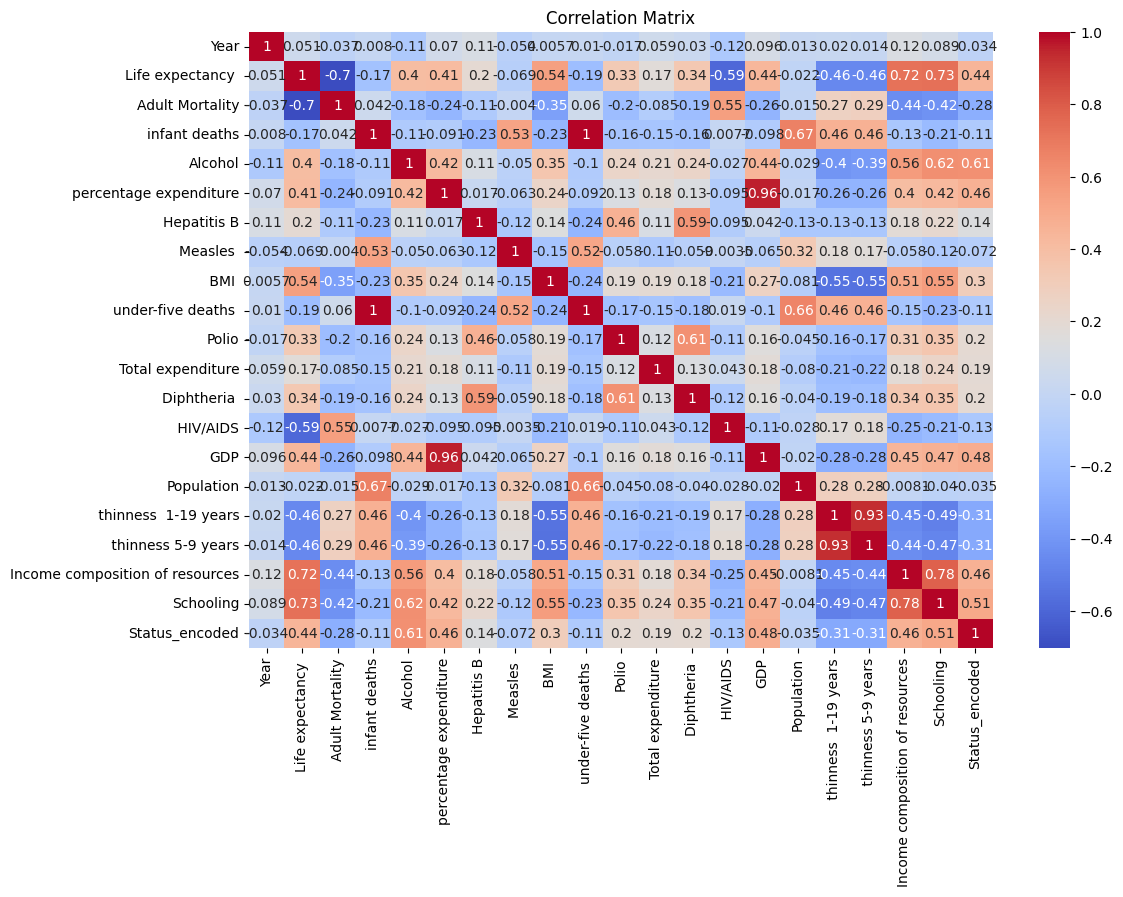

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
df['Status_encoded'] = df['Status'].map({'Developed': 1, 'Developing': 0})
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [13]:
# Binary encoding for 'Status'
df['Status_encoded'] = df['Status'].map({'Developing': 0, 'Developed': 1})

In [14]:
df.columns = df.columns.str.strip()
features = [
    'Adult Mortality', 'Schooling', 'HIV/AIDS', 'BMI', 'Income composition of resources',
    'Total expenditure', 'GDP', 'Alcohol', 'Status_encoded',
    'Polio', 'Diphtheria', 'Hepatitis B'
]

target = 'Life expectancy'


In [15]:
#Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#Train a linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
#Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 13.84
R-squared: 0.81


In [18]:
#See the coefficients of the model
coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coeffs


,Feature,Coefficient
4,Income composition of resources,9.336676
8,Status_encoded,1.052329
1,Schooling,1.009374
5,Total expenditure,0.100923
3,BMI,0.038003
10,Diphtheria,0.022322
9,Polio,0.010905
6,GDP,0.000058
11,Hepatitis B,-0.009151
0,Adult Mortality,-0.017411


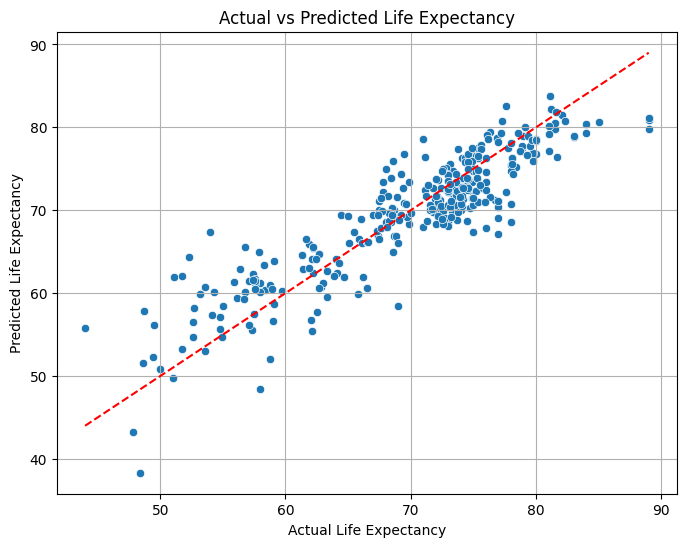

In [19]:
#Scatter plot of actual vs predicted values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted Life Expectancy")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.grid(True)
plt.show()


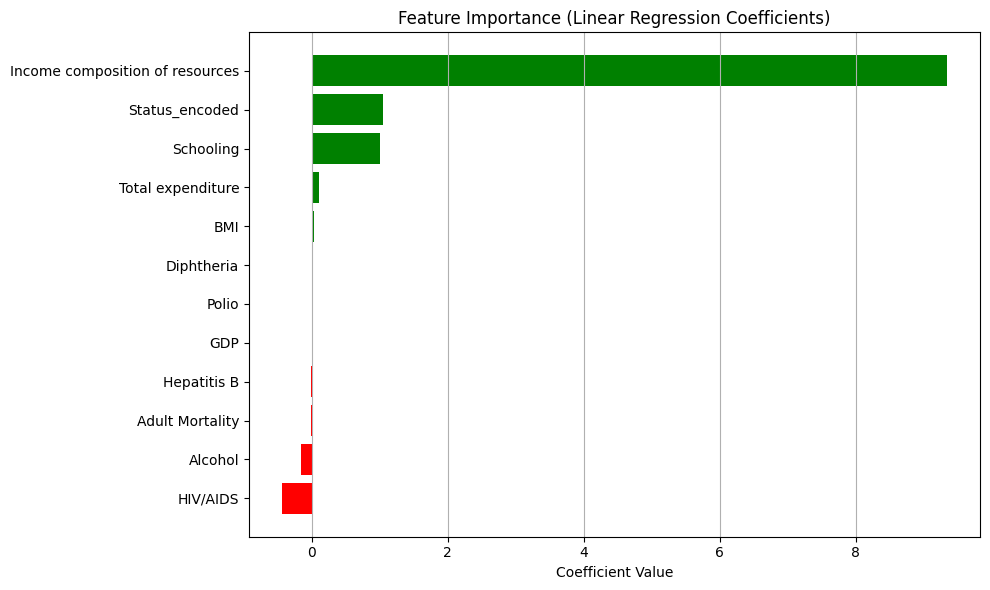

In [20]:
import matplotlib.pyplot as plt

# Data
features = [
    "Income composition of resources", "Status_encoded", "Schooling", "Total expenditure",
    "BMI", "Diphtheria", "Polio", "GDP", "Hepatitis B", "Adult Mortality", "Alcohol", "HIV/AIDS"
]
coefficients = [9.336676, 1.052329, 1.009374, 0.100923, 0.038003, 0.022322, 0.010905,
                0.000058, -0.009151, -0.017411, -0.162701, -0.435542]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, color=['green' if x > 0 else 'red' for x in coefficients])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


C:\Users\LIONESS\AppData\Local\Temp\ipykernel_4312\390439991.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=df, palette='coolwarm')


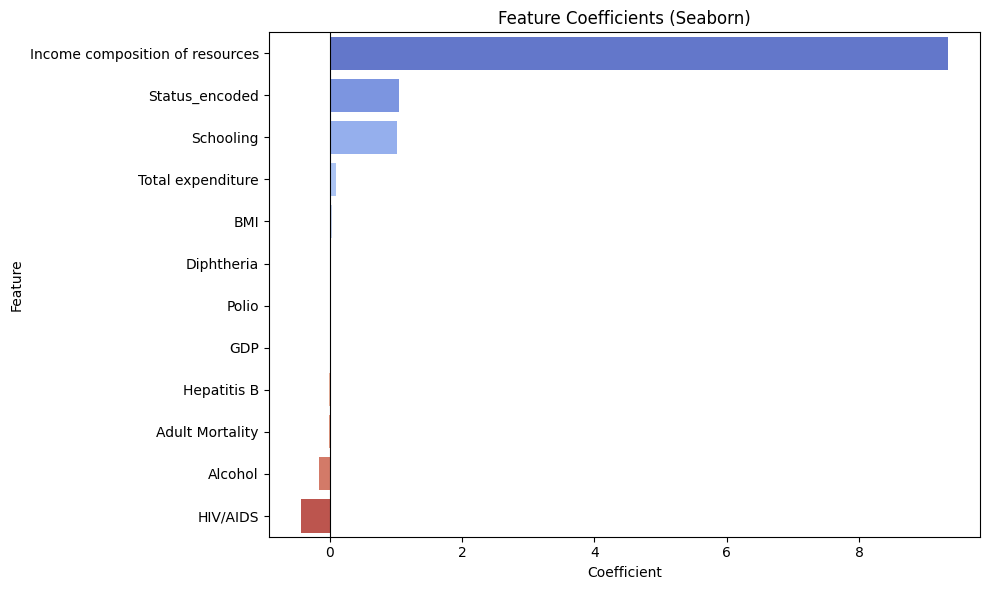

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame
df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=df, palette='coolwarm')
plt.title('Feature Coefficients (Seaborn)')
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()


In [22]:
import plotly.express as px
import pandas as pd

# DataFrame
df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plot
fig = px.bar(df, x='Coefficient', y='Feature',
             color='Coefficient', color_continuous_scale='RdBu',
             title='Feature Coefficients (Plotly Interactive)',
             orientation='h')
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()


| Rank | Feature                         | Coefficient | Effect on Prediction              |
| ---- | ------------------------------- | ----------- | --------------------------------- |
| 1    | Income composition of resources | 9.34        | Strong positive influence         |
| 2    | Status_encoded                  | 1.05        | Moderate positive influence       |
| 3    | Schooling                       | 1.01        | Moderate positive influence       |
| 4    | Total expenditure               | 0.10        | Slight positive influence         |
| 5    | BMI                             | 0.04        | Minimal positive influence        |
| 6    | Diphtheria                      | 0.02        | Negligible positive influence     |
| 7    | Polio                           | 0.01        | Negligible positive influence     |
| 8    | GDP                             | 0.00006     | Almost no effect                  |
| 9    | Hepatitis B                     | -0.009      | Negligible negative influence     |
| 10   | Adult Mortality                 | -0.017      | Negligible negative influence     |
| 11   | Alcohol                         | -0.16       | Small negative influence          |
| 12   | HIV/AIDS                        | -0.44       | Moderate negative influence       |

Key Insights
Strongest Positive Impact:
Income composition of resources has a very large positive coefficient (9.34), meaning it’s the most powerful predictor. As it increases, the target variable (i.e. life expectancy) increases significantly.
it likely represents access to wealth, education, and healthcare.

Moderate Positive Contributors:
Status_encoded and Schooling also strongly increase the predicted value.
Education and social status are clearly important drivers in this dataset.

Negative Impact:
HIV/AIDS has the largest negative coefficient, indicating that higher prevalence leads to lower predictions (likely indicating worse outcomes).
Alcohol also slightly lowers the predicted outcome — possibly indicating health risk behaviors.

Neutral or Weak Contributors:
Features like GDP, Diphtheria, Polio, BMI, Hepatitis B, and Adult Mortality have very small coefficients, suggesting:
Either they don’t influence the target much on their own
Or their effects are already captured by other correlated features

Business or Research Implications (Example)
If this data is related to health outcomes:
Focus on boosting income resources and education access for the biggest improvements.
Reducing HIV/AIDS and alcohol abuse could also improve outcomes significantly.
Vaccination rates (Polio, Diphtheria, Hepatitis B) don’t show strong impact in this model — maybe due to low variability or correlation with stronger variables like income.

Final Notes
Coefficient interpretation assumes linearity and no multicollinearity (you may want to check feature correlations using a heatmap).
The magnitudes are meaningful only if your features are on the same scale (standardized or normalized).
For deeper insights, combine this with residual analysis, correlation heatmaps, or feature selection techniques.

Summary
The model predicts the life expectancy based on several features:
Income composition of resources, Status_encoded, and Schooling have the strongest positive impact.
HIV/AIDS prevalence and Alcohol consumption show the most notable negative impact.
Other features like GDP, vaccination rates, and BMI have minimal individual effects in this model. The model helps explain which factors most influence the target and quantifies their effect sizes.

Conclusions
Economic and educational factors are the key drivers of positive outcomes in this dataset. Health risk factors like HIV/AIDS and alcohol use negatively affect the predicted outcomes. Some expected health indicators (e.g., vaccination rates) did not show strong effects, possibly due to indirect influence or correlations. The model’s coefficients reveal linear relationships and offer interpretable insights into the dataset.

Actionable Insights
Boost Income-Related Resources: Policies or programs that increase income composition (e.g., job creation, social support, wealth distribution) can have large positive effects.
Improve Education Access: Enhancing schooling quality and access leads to meaningful improvements in the target variable.
Address Health Risks: Focus on reducing HIV/AIDS prevalence and alcohol abuse through targeted healthcare initiatives and awareness campaigns.
Monitor Vaccination & Health Indicators: While vaccination rates showed weak direct effects, continued investment in immunization remains important for public health.

Recommendations
Policy Makers and NGOs: 
Prioritize income and education interventions as primary levers.
Design HIV/AIDS prevention and alcohol reduction programs to mitigate negative impacts.
Use this model to track progress and adjust strategies based on changing data.

Data Scientists and Analysts:
Explore interactions and non-linear effects to refine insights.
Consider feature scaling and multicollinearity checks to improve model accuracy.
Use complementary models (e.g., decision trees) to capture complex relationships.